# Python 実践データ分析 100本ノック 第2版

(Python Practical Data Analysis 100 Knocks, 2nd ed.)

### 第3部 実践編②：最適化問題

(Part 3: Practice 2: Optimization Problem)

### 第8章 数値シミュレーションで消費者行動を予測する10本ノック

 (Chapter 08: 10 knocks to predict consumer behavior through numerical simulation)

In [2]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Move to working folder
import os
os.chdir('/content/drive/MyDrive/Colab-Notebooks/python-100knock-data-analytics/chap08/')

### knock 71 : Let's visualize the network of relationships.

| No. | File Name | Outline |
|-----------|-----------|-----------|
|  1  | link.csv         | SNS connections of 20 repeat customers  |
|  2  | link_members.csv | SNS connections of 540 repeat customers |
|  3  | info_members.csv | Monthly usage by 540 repeat customers   |

`info_members.csv`:

*   Months with usage:1
*   Months with no usage:0

In [1]:
import pandas as pd

In [4]:
df_links = pd.read_csv("links.csv", index_col="Node")
df_links.head()

,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
Node,,,,,,,,,,,,,,,,,,,,
Node0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Node1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
Node2,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
Node3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
Node4,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0


*   Connected on SNS: 1

*   Not connected on SNS: 0

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

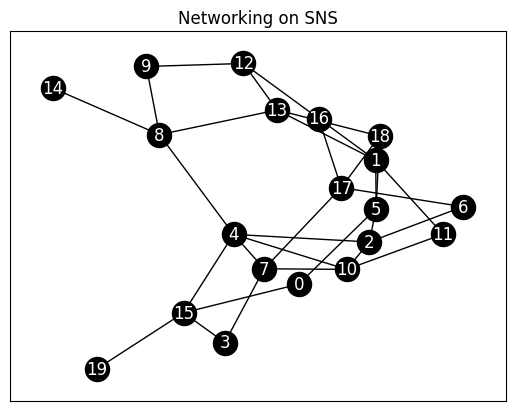

In [54]:
# Creating Graph Objects
G = nx.Graph()

# Vertex Settings
NUM = len(df_links.index)
for i in range(NUM):
    node_no = df_links.columns[i].strip("Node")
    G.add_node(str(node_no))

# Edge setting
for i in range(NUM):
    for j in range(NUM):
        node_name = "Node" + str(j)
        if df_links[node_name].iloc[i]==1:
            G.add_edge(str(i),str(j))

# drawing
nx.draw_networkx(G,node_color="k", edge_color="k", font_color="w")
plt.title('Networking on SNS')
plt.show()

### knock 72 : Let's visualize the propagation of information by word of mouth.

In [7]:
import numpy as np

In [63]:
# Decide whether to propagate word of mouth probabilistically
def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val<=percent:
        return 1
    else:
        return 0

In [64]:
def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    return list_active

In [65]:
# Assume 10% probability that word of mouth will occur.
percent_percolation = 0.1
# Repeat for 36 months
T_NUM = 36
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

In [66]:
# Active Node Visualization
def active_node_coloring(list_active):
    #print(list_timeSeries[t])
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append("r")
        else:
            list_color.append("k")
    #print(len(list_color))
    return list_color

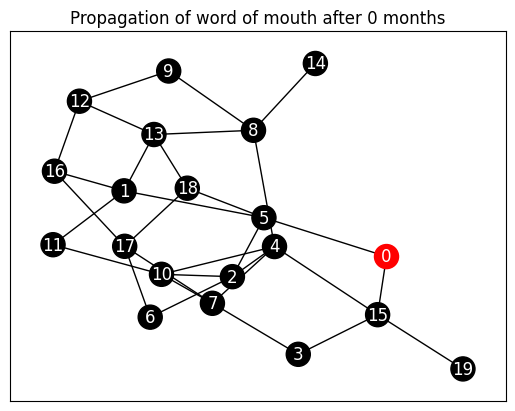

In [57]:
# After 0 months
t = 0
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.title('Propagation of word of mouth after 0 months')
plt.show()

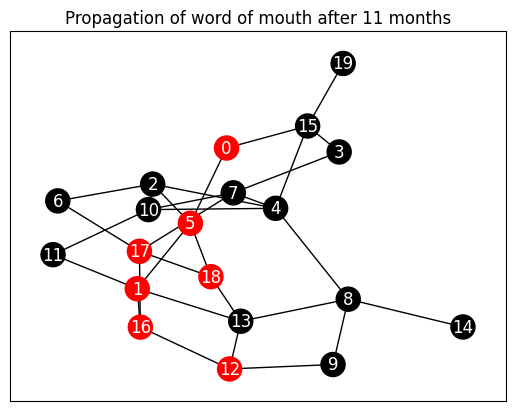

In [67]:
# After 11 months
t = 11
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.title('Propagation of word of mouth after 11 months')
plt.show()

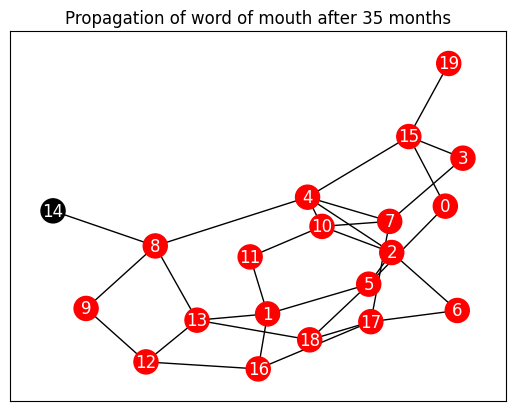

In [60]:
# After 35 months
t = 35
nx.draw_networkx(G,font_color="w",node_color=active_node_coloring(list_timeSeries[t]))
plt.title('Propagation of word of mouth after 35 months')
plt.show()

Propagation was gradual in about 10 months, but after a long time, it spread to all.

### knock 73 : Let's graph the time-series changes in the number of word-of-mouth

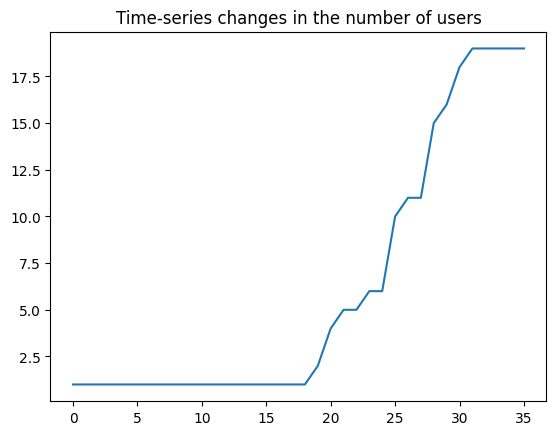

In [62]:
# Draw a time-series graph
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.title('Time-series changes in the number of users')
plt.show()

It is evident that the phenomenon of word-of-mouth marketing unfolds in distinct phases.

### knock 74 : Let's simulate a time-series change in the number of members.

In [46]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence,df_links):
    # Spreading
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    # disappearance
    for i in range(num):
        if determine_link(percent_disapparence)==1:
            list_active[i] = 0
    return list_active

In [47]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

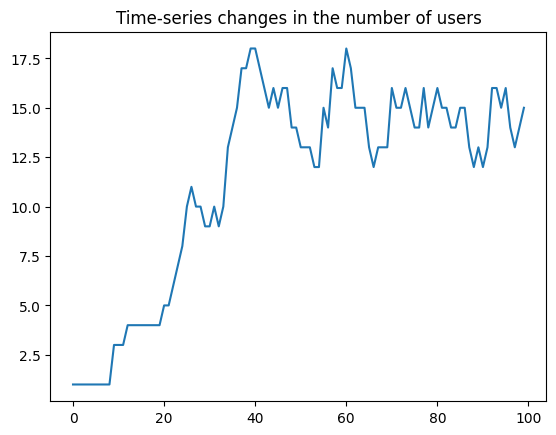

In [48]:
# Draw a time-series graph
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.title('Time-series changes in the number of users')
plt.show()

In [50]:
percent_disapparence = 0.2
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

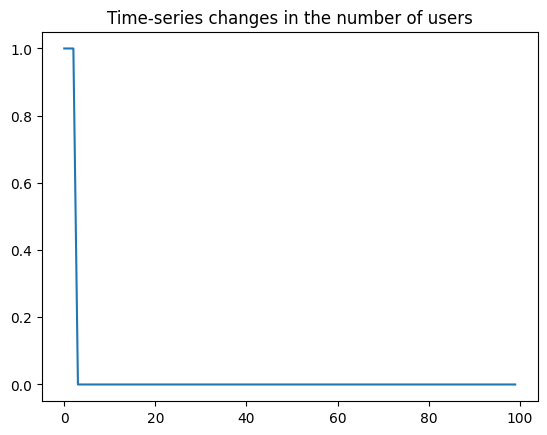

In [51]:
# Draw a time-series graph
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

plt.plot(list_timeSeries_num)
plt.title('Time-series changes in the number of users')
plt.show()

If the probability of extinction is set at 20%, by the end of 10 months, there will be no remaining users.

### knock 75 : Let's take a look at the phase diagram to get an overall picture of the parameters.

In [21]:
# Chart calculations
print("Start of phase diagram calculation")
# How many people are still using the system after 100 months?
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram,NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05*i_p
        percent_disapparence = 0.05*i_d
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)
print(phaseDiagram)

Start of phase diagram calculation
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 15. 16.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 20. 15. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 14.  0. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 17. 15.  0. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 17. 18. 13. 13.  8.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 16. 14. 18. 12. 11. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 20. 18. 13. 13. 11.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 19. 15. 16. 17. 13. 12. 11.  8.  9.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 18. 15. 14. 14. 12. 

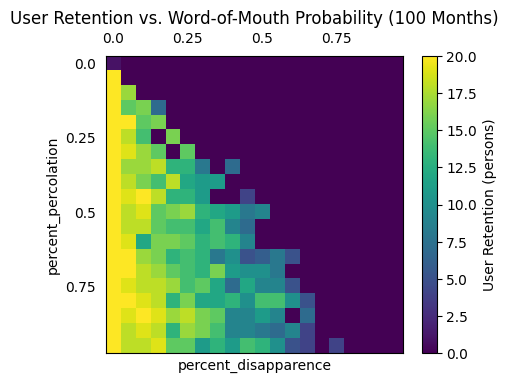

In [25]:
# indication
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8).set_label('User Retention (persons)')
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0,5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
plt.title('User Retention vs. Word-of-Mouth Probability (100 Months)')
plt.show()

Word-of-mouth extinction probability greater than 50-60% suggests that no matter how large the word-of-mouth probability is, the number of users will not increase

### knock 76 : Let's read the actual data.

In [26]:
df_mem_links = pd.read_csv("links_members.csv", index_col="Node")
df_mem_info = pd.read_csv("info_members.csv", index_col="Node")
df_mem_links.head()

,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
Node,,,,,,,,,,,,,,,,,,,,,
Node0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Node1,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
Node2,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
Node3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Node4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


*   Month of use: 1

*   Non-use month: 0

### knock 77 : Visualize the distribution of the number of links!

In [27]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links["Node"+str(i)])

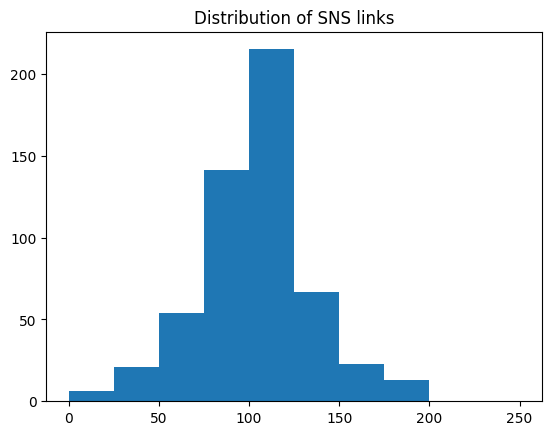

In [42]:
plt.hist(array_linkNum, bins=10,range=(0,250))
plt.title('Distribution of SNS links')
plt.show()

* The histogram shows link counts clustered around 100, resembling a normal distribution.
* In small-world and scale-free networks, the distribution resembles a power-law.
* In such networks (a normal distribution), word of mouth spreads steadily without relying heavily on hubs.
* However, in scale-free networks, failure of a hub can quickly halt word-of-mouth spread.

### knock 78 : Let's estimate parameters from real data for simulation.

In [29]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns)-1
# Probability estimation of disappearance
count_active = 0
count_active_to_inactive = 0
for t in range(T_NUM):
    for i in range(NUM):
        if (df_mem_info.iloc[i][t]==1):
            count_active_to_inactive += 1
            if (df_mem_info.iloc[i][t+1]==0):
                count_active += 1
estimated_percent_disapparence = count_active/count_active_to_inactive

<ipython-input-29-857611f4875e>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df_mem_info.iloc[i][t]==1):
<ipython-input-29-857611f4875e>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df_mem_info.iloc[i][t+1]==0):


In [30]:
# Probability estimation of percolation
count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM):
    df_link_t = df_mem_info[df_mem_info[str(t)]==1]
    temp_flag_count = np.zeros(NUM)
    for i in range(len(df_link_t.index)):
        index_i = int(df_link_t.index[i].replace("Node",""))
        df_link_temp = df_mem_links[df_mem_links["Node"+str(index_i)]==1]
        for j in range(len(df_link_temp.index)):
            index_j = int(df_link_temp.index[j].replace("Node",""))
            if (df_mem_info.iloc[index_j][t]==0):
                if (temp_flag_count[index_j]==0):
                    count_link += 1
                if (df_mem_info.iloc[index_j][t+1]==1):
                    if (temp_flag_count[index_j]==0):
                        temp_flag_count[index_j] = 1
                        count_link_to_active += 1
estimated_percent_percolation = count_link_to_active/count_link

<ipython-input-30-0f7d135d225e>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df_mem_info.iloc[index_j][t]==0):
<ipython-input-30-0f7d135d225e>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df_mem_info.iloc[index_j][t+1]==1):


In [31]:
estimated_percent_disapparence

0.10147163541419416

In [32]:
estimated_percent_percolation

0.039006364196263604

### knock 79 : Let's compare actual data and simulations.

In [33]:
percent_percolation = 0.039006364196263604
percent_disapparence = 0.10147163541419416
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
  list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
  list_timeSeries.append(list_active.copy())

In [34]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [35]:
T_NUM = len(df_mem_info.columns)-1
list_timeSeries_num_real = []
for t in range(0,T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)]==1].index))

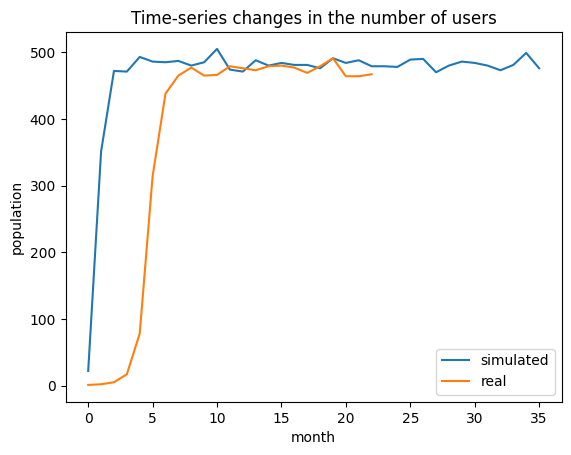

In [40]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.plot(list_timeSeries_num_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.title('Time-series changes in the number of users')
plt.show()

*   The number of users by simulation shows a behavior similar to that by real data.
*   It shifts by a few months, but by nature it starts up sooner or later.

### knock 80 : Let's conduct a simulation to predict the future.

In [37]:
percent_percolation = 0.039006364196263604
percent_disapparence = 0.10147163541419416
# Duration set to 36 months
T_NUM = 36
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [38]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

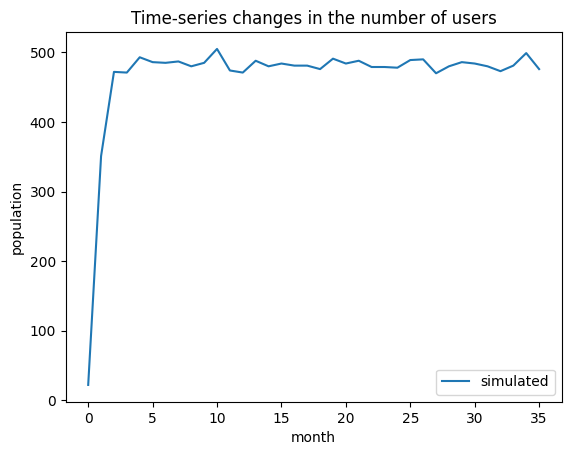

In [41]:
plt.plot(list_timeSeries_num, label = 'simulated')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='lower right')
plt.title('Time-series changes in the number of users')
plt.show()

Suggests that the trend will continue without sudden rises, etc.